# Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
custDF = pd.read_csv('C:/Users/Nandan/Dropbox/PG-DBDA CDAC Mumbai/ML/Customers.csv')

In [3]:
custDF

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X=custDF.iloc[:,[3,4]].values #taking 2 features for caluclating inter-point simialrity because we can plot 2D here only.

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

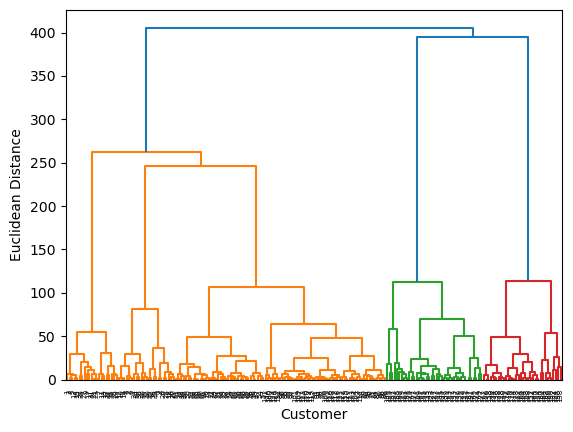

In [12]:
#find the number of clusters
#Model building
#hierarchical clustering
import scipy.cluster.hierarchy as sch #clusters will be in form of dendrograms for which all necessary calculations are available in the hierarchy package

dn=sch.dendrogram(sch.linkage(X,method='ward')) #linkage fucntion gives option to specify the method and distance metric(like euclidean, manhattan etc
dn
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

# Agglomerative Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = model.fit_predict(X)

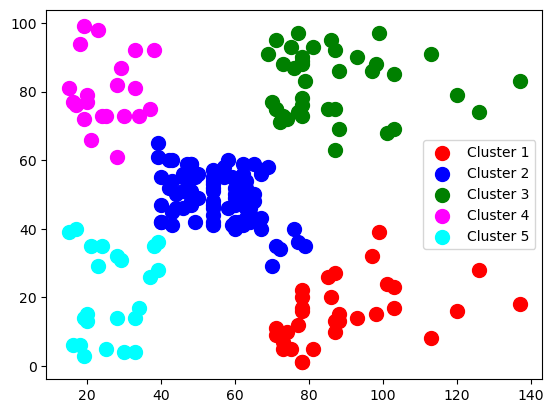

In [19]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1], s=100, c='magenta', label='Cluster 4')
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1], s=100, c='cyan', label='Cluster 5')
plt.legend()
plt.show()

# K-means

In [21]:
X=custDF.iloc[:,[3,4]].values

C:\Users\Nandan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


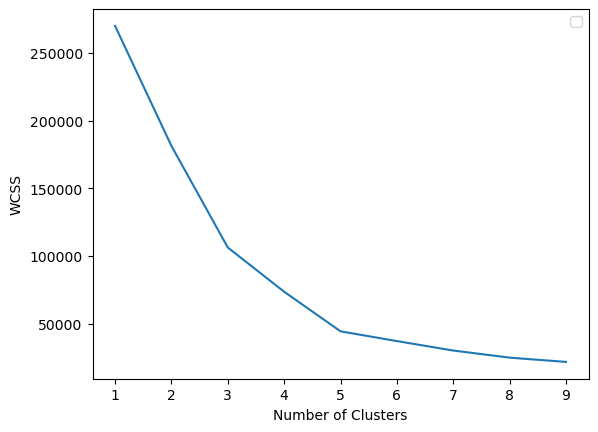

In [24]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    model = KMeans(n_clusters=i,init='k-means++', random_state=42) #init = k-means++ gives the best posible initial value of the centroid when forming the clusters (centroid value taken randomly) --> this is the difference with K-means
    model.fit(X)
    wcss.append(model.inertia_)
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

In [25]:
model2 = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_pred = model2.fit_predict(X) 

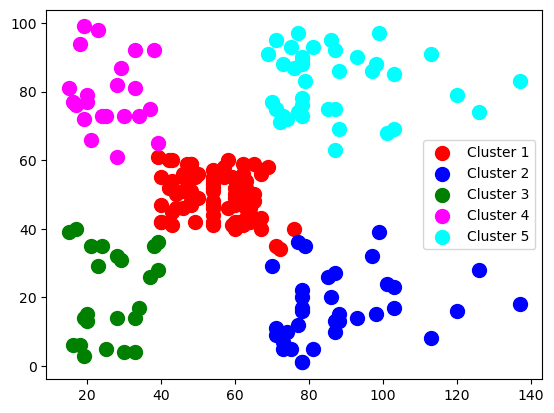

In [26]:
plt.scatter(X[y_pred == 0,0], X[y_pred == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1,0], X[y_pred == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_pred == 2,0], X[y_pred == 2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_pred == 3,0], X[y_pred == 3,1], s=100, c='magenta', label='Cluster 4')
plt.scatter(X[y_pred == 4,0], X[y_pred == 4,1], s=100, c='cyan', label='Cluster 5')
plt.legend()
plt.show()